# SI-618 Final Project <br>Live or Die: Predicting Outcome When Horses Colic</br>

MY_UNIQNAME = 'vdall'

## Header and Scrap

In [940]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

colic_df = pd.read_csv('horse.csv')

In [941]:
colic_df.sample(5)

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
93,no,adult,530310,NaN,NaN,NaN,cool,reduced,normal_pink,less_3_sec,...,38.0,6.5,NaN,NaN,died,yes,3205,0,0,no
59,no,adult,528904,NaN,96.0,NaN,cool,reduced,pale_pink,more_3_sec,...,60.0,NaN,NaN,NaN,died,yes,4205,0,0,no
248,no,adult,528169,38.2,48.0,NaN,warm,NaN,normal_pink,more_3_sec,...,34.0,6.6,NaN,NaN,lived,no,3111,0,0,no
45,no,adult,529827,NaN,120.0,NaN,cold,reduced,pale_cyanotic,more_3_sec,...,60.0,6.5,serosanguious,NaN,died,yes,3205,0,0,no
133,yes,adult,527524,NaN,100.0,NaN,cool,NaN,pale_cyanotic,more_3_sec,...,59.0,6.3,NaN,NaN,died,yes,4205,0,0,no


In [942]:
colic_df.describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,2.990000e+02,239.000000,275.000000,241.000000,53.000000,270.000000,266.000000,101.000000,299.000000,299.000000,299.000000
mean,1.087733e+06,38.168619,72.000000,30.460581,4.707547,46.307407,24.274436,3.039604,3659.709030,90.528428,7.387960
std,1.532032e+06,0.733744,28.646219,17.666102,1.982311,10.436743,27.364194,1.967947,5408.472421,650.637139,127.749768
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.289040e+05,37.800000,48.000000,18.000000,3.000000,38.000000,6.500000,2.000000,2111.500000,0.000000,0.000000
50%,5.303010e+05,38.200000,64.000000,25.000000,5.000000,45.000000,7.500000,2.300000,2322.000000,0.000000,0.000000
75%,5.347360e+05,38.500000,88.000000,36.000000,6.500000,52.000000,56.750000,3.900000,3209.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


In [943]:
colic_df.dtypes

surgery                   object
age                       object
hospital_number            int64
rectal_temp              float64
pulse                    float64
respiratory_rate         float64
temp_of_extremities       object
peripheral_pulse          object
mucous_membrane           object
capillary_refill_time     object
pain                      object
peristalsis               object
abdominal_distention      object
nasogastric_tube          object
nasogastric_reflux        object
nasogastric_reflux_ph    float64
rectal_exam_feces         object
abdomen                   object
packed_cell_volume       float64
total_protein            float64
abdomo_appearance         object
abdomo_protein           float64
outcome                   object
surgical_lesion           object
lesion_1                   int64
lesion_2                   int64
lesion_3                   int64
cp_data                   object
dtype: object

In [1105]:
scrap_df=colic_df[["abdominal_distention","surgery","outcome"]]
scrap_df.groupby(["abdominal_distention","surgery","outcome"]).size().to_frame(name='count').reset_index()

,abdominal_distention,surgery,outcome,count
0,moderate,no,died,4
1,moderate,no,euthanized,7
2,moderate,no,lived,4
3,moderate,yes,died,23
4,moderate,yes,euthanized,5
5,moderate,yes,lived,22
6,none,no,died,3
7,none,no,euthanized,3
8,none,no,lived,35
9,none,yes,died,4


In [1119]:
scrap2_df=colic_df[["peristalsis","surgery","outcome"]]
scrap2_df.groupby(["peristalsis","surgery","outcome"]).size().to_frame(name='count').reset_index()

,peristalsis,surgery,outcome,count
0,absent,no,died,9
1,absent,no,euthanized,5
2,absent,no,lived,4
3,absent,yes,died,19
4,absent,yes,euthanized,12
5,absent,yes,lived,24
6,hypermotile,no,died,1
7,hypermotile,no,euthanized,1
8,hypermotile,no,lived,26
9,hypermotile,yes,died,2


# Q 1: Surgery is a risky proposition and done as a last resort. Of the horses that underwent surgery, how many recovered? Also, is there a relationship between the horse's age and likelihood it will recover from surgery?
<br>Figure out what percentage of horses recovered from surgery and represent that as a visualization. The same would be done with horses that were considered an adult (over 6 months) or not.</br>
<br>Use Seaborn/Matplotlib</br>

In [944]:
q1_df=colic_df[["hospital_number","age","surgery","outcome"]]
q1_df.sample(5)

,hospital_number,age,surgery,outcome
65,534885,adult,yes,lived
22,521681,adult,yes,lived
24,533692,adult,yes,lived
16,5301219,young,yes,died
56,528872,adult,yes,lived


In [945]:
print(q1_df["outcome"].value_counts())
print(q1_df["age"].value_counts())
print(q1_df["surgery"].value_counts())
print(q1_df.count())

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64
adult    275
young     24
Name: age, dtype: int64
yes    180
no     119
Name: surgery, dtype: int64
hospital_number    299
age                299
surgery            299
outcome            299
dtype: int64


In [946]:
surgery=q1_df.groupby(["surgery","outcome","age"]).size().to_frame(name='count').reset_index()
surgery_filter = surgery[(surgery['surgery'] == 'yes')]
surgery_filter #not used for visualization, just looking at results

,surgery,outcome,age,count
5,yes,died,adult,48
6,yes,died,young,10
7,yes,euthanized,adult,26
8,yes,euthanized,young,1
9,yes,lived,adult,88
10,yes,lived,young,7


In [947]:
surgery

,surgery,outcome,age,count
0,no,died,adult,18
1,no,died,young,1
2,no,euthanized,adult,17
3,no,lived,adult,78
4,no,lived,young,5
5,yes,died,adult,48
6,yes,died,young,10
7,yes,euthanized,adult,26
8,yes,euthanized,young,1
9,yes,lived,adult,88


[Text(0.5, 1.0, 'Mortality Comparison of Horses Elected for Surgery or Not: Raw Data')]

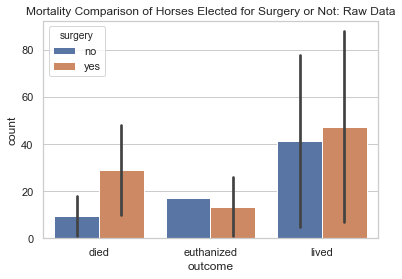

In [948]:
sns.barplot(x="outcome",y="count",hue="surgery",data=surgery).set(title="Mortality Comparison of Horses Elected for Surgery or Not: Raw Data")

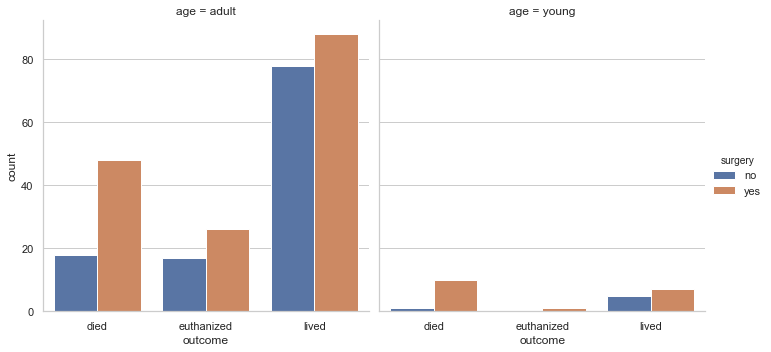

In [949]:
sns.catplot(x="outcome", y="count",
                hue="surgery", col="age",
                data=surgery, kind="bar")

In [950]:
surgery_stat=(100*surgery["count"]/surgery["count"].sum()).to_frame(name='percentage')
surgery_stat

merged_s = surgery.merge(surgery_stat, left_index=True, right_index=True)
merged_s

,surgery,outcome,age,count,percentage
0,no,died,adult,18,6.020067
1,no,died,young,1,0.334448
2,no,euthanized,adult,17,5.685619
3,no,lived,adult,78,26.086957
4,no,lived,young,5,1.672241
5,yes,died,adult,48,16.053512
6,yes,died,young,10,3.344482
7,yes,euthanized,adult,26,8.695652
8,yes,euthanized,young,1,0.334448
9,yes,lived,adult,88,29.431438


[Text(0.5, 1.0, 'Mortality Comparison of Horses Elected for Surgery or Not: By Percentage of Patients')]

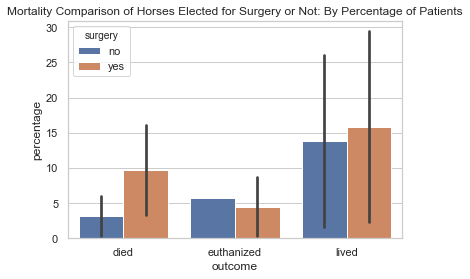

In [951]:
sns.barplot(x="outcome",y="percentage",hue="surgery",data=merged_s).set(title="Mortality Comparison of Horses Elected for Surgery or Not: By Percentage of Patients")

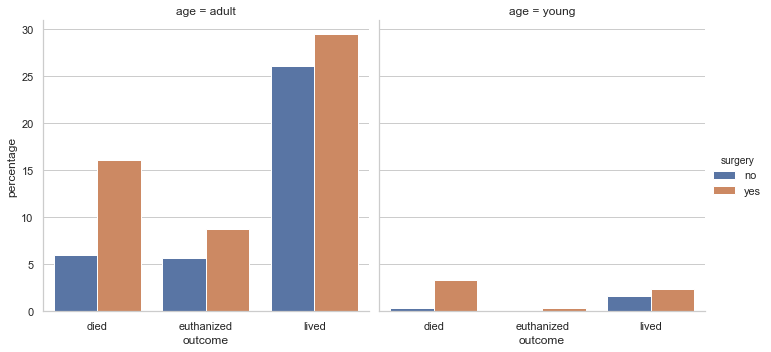

In [952]:
sns.catplot(x="outcome", y="percentage",
                hue="surgery", col="age",
                data=merged_s, kind="bar")

# Q 2: Veterinarians record numerous vitals when a horse presents with colic. Are certain vital level measurements (e.g. temperature, respiratory rate, pulse, and total protein) predictive of whether or not a horse will recover from colic?
<br>Create a pairplot using the chosen vitals and figure out the variations between the different groups.</br>
<br>Use Seaborn/Matplotlib and ANOVA/Regression</br>

In [1160]:
q2_df=colic_df[["rectal_temp","pulse","respiratory_rate","packed_cell_volume","total_protein","abdomo_protein","outcome"]]
q2_df.dropna(0,inplace=True)
q2_df.sample(5)

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,outcome
262,37.1,75.0,36.0,48.0,7.4,3.2,died
191,38.2,48.0,18.0,48.0,74.0,2.0,lived
222,37.7,66.0,12.0,31.5,6.2,1.6,lived
64,39.0,64.0,36.0,44.0,7.5,5.0,lived
155,38.6,52.0,20.0,36.0,6.6,5.0,lived


In [1161]:
q2_df.mean()

rectal_temp           38.145714
pulse                 76.071429
respiratory_rate      29.600000
packed_cell_volume    47.392857
total_protein         25.898571
abdomo_protein         3.007143
dtype: float64

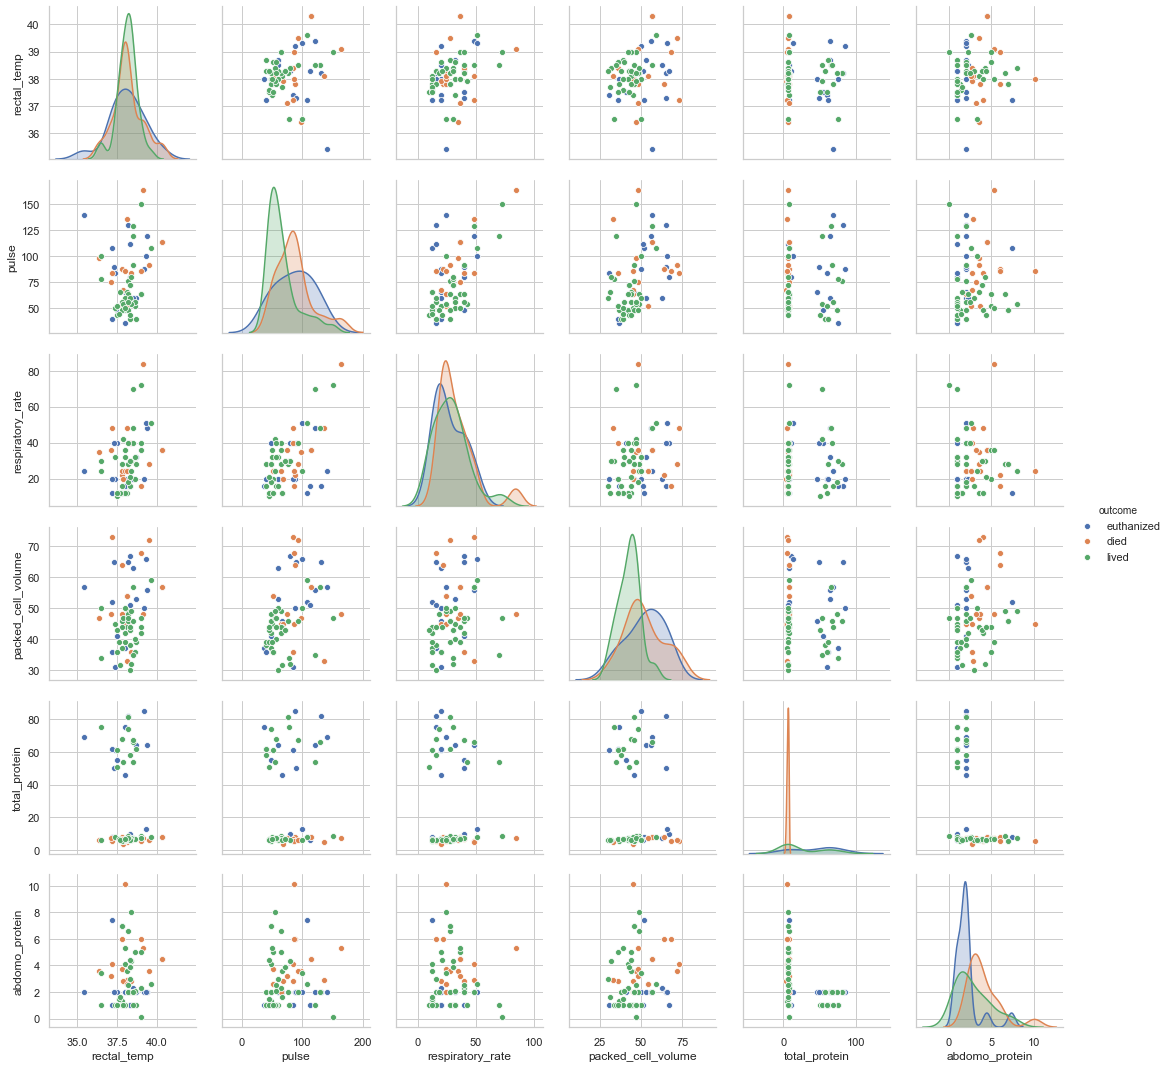

In [955]:
sns.pairplot(q2_df, hue="outcome")

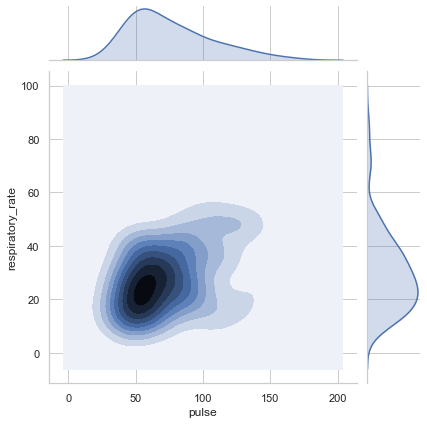

In [1157]:
sns.jointplot("pulse","respiratory_rate", data=q2_df, kind='kde') #normal rr is 8-10 p/min 

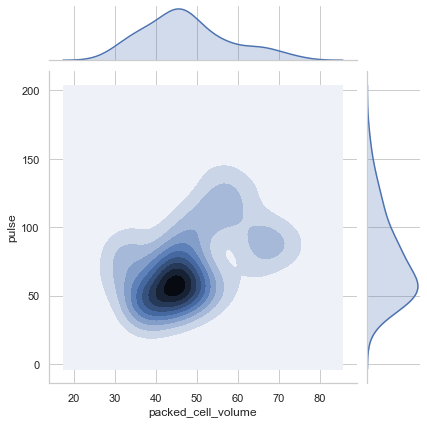

In [1155]:
sns.jointplot("packed_cell_volume","pulse", data=q2_df, kind='kde')#normal pcv is between 30-50; pulse 28-44 bpm

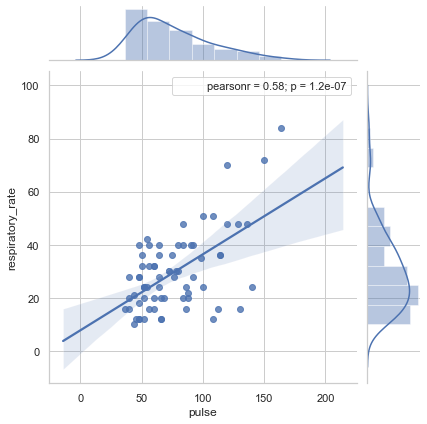

In [958]:
g = sns.JointGrid(data=q2_df,x='pulse',y='respiratory_rate')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

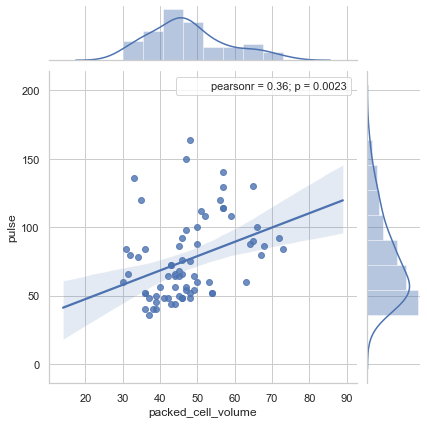

In [1154]:
g = sns.JointGrid(data=q2_df,x='packed_cell_volume',y='pulse')
g = g.plot(sns.regplot, sns.distplot)
g = g.annotate(stats.pearsonr)

In [1158]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [1162]:
x={'lived':1,'died':2,'euthanized':3}
q2_df['outcome']=q2_df['outcome'].map(x)
new_q2=q2_df
new_q2.sample(5)

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,outcome
257,37.5,52.0,12.0,36.0,61.0,1.0,1
171,38.5,129.0,48.0,57.0,66.0,2.0,1
111,38.3,40.0,16.0,38.0,58.0,2.0,1
3,39.1,164.0,84.0,48.0,7.2,5.3,2
14,38.2,76.0,28.0,46.0,81.0,2.0,1


In [1163]:
new_q2['isalive'] = np.where(new_q2['outcome']==1,'alive','dead')
new_q2.sample(5)

,rectal_temp,pulse,respiratory_rate,packed_cell_volume,total_protein,abdomo_protein,outcome,isalive
224,38.4,54.0,24.0,49.0,7.2,8.0,1,alive
220,38.5,92.0,40.0,46.0,67.0,2.0,1,alive
49,37.2,84.0,48.0,73.0,5.5,4.1,2,dead
99,39.6,108.0,51.0,59.0,8.0,2.6,1,alive
33,38.2,64.0,28.0,49.0,8.6,6.6,1,alive


In [1164]:
new_q2.mean()

rectal_temp           38.145714
pulse                 76.071429
respiratory_rate      29.600000
packed_cell_volume    47.392857
total_protein         25.898571
abdomo_protein         3.007143
outcome                1.714286
dtype: float64

In [1166]:
anova_q1 = smf.ols('pulse ~ C(isalive)', data=new_q2).fit()
anova_q1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pulse   R-squared:                       0.121
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     9.399
Date:                Tue, 21 Apr 2020   Prob (F-statistic):            0.00311
Time:                        06:32:34   Log-Likelihood:                -331.98
No. Observations:                  70   AIC:                             668.0
Df Residuals:                      68   BIC:                             672.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             66.3243      4.630     14.323      0.000      57.084      75.564
C(isalive)[T.dead]    20.6757      6.744      3.066      0.003       7.218      34.133
==============================================================================
Omnibus:                       11.662   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.932
Skew:                           0.942   Prob(JB):                      0.00256
Kurtosis:                       3.737   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1167]:
aov_table = sm.stats.anova_lm(anova_q1, typ=2)
print(aov_table)

                  sum_sq    df         F    PR(>F)
C(isalive)   7456.534749   1.0  9.399091  0.003113
Residual    53946.108108  68.0       NaN       NaN


In [1168]:
anova_q2 = smf.ols('respiratory_rate ~ C(isalive)', data=new_q2).fit()
anova_q2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       respiratory_rate   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                    0.1947
Date:                Tue, 21 Apr 2020   Prob (F-statistic):              0.660
Time:                        06:32:43   Log-Likelihood:                -286.74
No. Observations:                  70   AIC:                             577.5
Df Residuals:                      68   BIC:                             582.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             28.8649      2.426     11.897      0.000      24.023      33.706
C(isalive)[T.dead]     1.5594      3.534      0.441      0.660      -5.492       8.611
==============================================================================
Omnibus:                       23.749   Durbin-Watson:                   2.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.030
Skew:                           1.328   Prob(JB):                     1.50e-08
Kurtosis:                       5.303   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1169]:
aov_table = sm.stats.anova_lm(anova_q2, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
C(isalive)     42.41507   1.0  0.194743  0.660398
Residual    14810.38493  68.0       NaN       NaN


In [1170]:
anova_q3 = smf.ols('packed_cell_volume ~ C(isalive)', data=new_q2).fit()
anova_q3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     packed_cell_volume   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     18.99
Date:                Tue, 21 Apr 2020   Prob (F-statistic):           4.55e-05
Time:                        06:33:06   Log-Likelihood:                -253.07
No. Observations:                  70   AIC:                             510.1
Df Residuals:                      68   BIC:                             514.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.9054      1.500     28.606      0.000      39.912      45.898
C(isalive)[T.dead]     9.5188      2.184      4.358      0.000       5.160      13.878
==============================================================================
Omnibus:                        0.028   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.986   Jarque-Bera (JB):                0.037
Skew:                           0.016   Prob(JB):                        0.982
Kurtosis:                       2.892   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1171]:
aov_table = sm.stats.anova_lm(anova_q3, typ=2)
print(aov_table)

                 sum_sq    df         F    PR(>F)
C(isalive)  1580.466904   1.0  18.98801  0.000046
Residual    5659.979525  68.0       NaN       NaN


In [1172]:
anova_q4 = smf.ols('total_protein ~ C(isalive)', data=new_q2).fit()
anova_q4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_protein   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                   0.01918
Date:                Tue, 21 Apr 2020   Prob (F-statistic):              0.890
Time:                        06:33:20   Log-Likelihood:                -331.79
No. Observations:                  70   AIC:                             667.6
Df Residuals:                      68   BIC:                             672.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             25.4595      4.618      5.513      0.000      16.245      34.674
C(isalive)[T.dead]     0.9314      6.726      0.138      0.890     -12.489      14.352
==============================================================================
Omnibus:                       18.194   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               11.967
Skew:                           0.871   Prob(JB):                      0.00252
Kurtosis:                       1.967   Cond. No.                         2.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1173]:
aov_table = sm.stats.anova_lm(anova_q4, typ=2)
print(aov_table)

                  sum_sq    df        F   PR(>F)
C(isalive)     15.133395   1.0  0.01918  0.89026
Residual    53652.016462  68.0      NaN      NaN


# Q 3: Some of the vitals taken, like pain, temperature of extremities, and characteristics of the abdomen, are more on the subjective side. How do these ratings correlate to whether a horse will require surgery or not?
<br>Create a contingency table to explore the relationship between the different categories of measurement. Further representations can be made using heatmaps.</br>
<br>Use Seaborn/Matplotlib and Contingency Table/Chi-squared</br>

In [972]:
from scipy.stats import chi2_contingency
q3_df=colic_df[['hospital_number','surgery','pain','temp_of_extremities','peristalsis','abdominal_distention']]
q3_df.sample(10)
#variables with subjective criteria

,hospital_number,surgery,pain,temp_of_extremities,peristalsis,abdominal_distention
174,527929,yes,NaN,NaN,NaN,NaN
152,528804,no,alert,cool,hypomotile,slight
200,528641,yes,severe_pain,normal,absent,moderate
237,528702,no,mild_pain,cool,hypomotile,slight
86,529388,yes,extreme_pain,cool,absent,moderate
47,529821,no,alert,normal,hypermotile,none
241,530354,yes,extreme_pain,normal,hypomotile,moderate
259,534933,no,severe_pain,NaN,hypomotile,slight
270,534626,yes,extreme_pain,cool,absent,none
46,529888,yes,extreme_pain,cool,absent,severe


## Abdominal Distention

In [1096]:
ab=pd.crosstab(q3_df.abdominal_distention,q3_df.surgery,margins=False)
ab.drop(ab[-1:].index,inplace=True)
ab

surgery,no,yes
abdominal_distention,,
moderate,15,50
none,41,34
severe,11,27


In [1097]:
chi2, p, dof, ex_ab = chi2_contingency(ab)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  16.359548778339036
p-val =  0.0002802651638528373
degree of freedom =  2


In [1098]:
pd.DataFrame(ex_ab)

,0,1
0,24.466292,40.533708
1,28.230337,46.769663
2,14.303371,23.696629


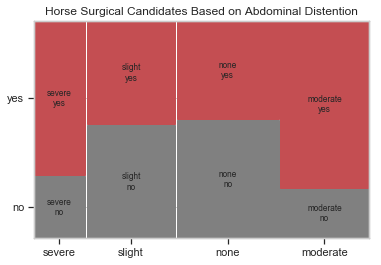

In [1099]:
from statsmodels.graphics.mosaicplot import mosaic
props = lambda key: {'color': 'r' if 'yes' in key else 'gray'}
ab_vis = mosaic(q3_df, ['abdominal_distention','surgery'],title='Horse Surgical Candidates Based on Abdominal Distention',properties=props)

[Text(0.5, 1, 'Horse Surgical Candidates Based on Abdominal Distention')]

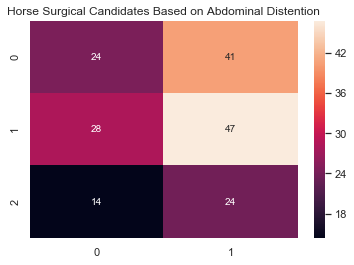

In [1101]:
sns.heatmap(ex_ab,annot=True).set(title="Horse Surgical Candidates Based on Abdominal Distention")

## Peristalsis

In [1114]:
peristalsis=pd.crosstab(q3_df.peristalsis,q3_df.surgery,margins=False)
peristalsis

surgery,no,yes
peristalsis,,
absent,18,55
hypermotile,28,11
hypomotile,49,78
normal,5,11


In [1115]:
chi2, p, dof, ex_peri = chi2_contingency(peristalsis)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  24.30360054000535
p-val =  2.158706853482651e-05
degree of freedom =  3


In [1116]:
pd.DataFrame(ex_peri)

,0,1
0,28.627451,44.372549
1,15.294118,23.705882
2,49.803922,77.196078
3,6.274510,9.725490


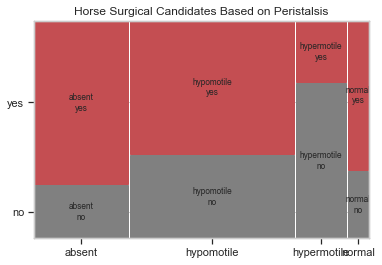

In [1117]:
props = lambda key: {'color': 'r' if 'yes' in key else 'gray'}
peri_vis = mosaic(q3_df, ['peristalsis','surgery'],title='Horse Surgical Candidates Based on Peristalsis',properties=props)

[Text(0.5, 1, 'Horse Surgical Candidates Based on Peristalsis')]

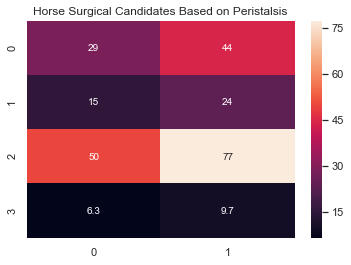

In [1118]:
sns.heatmap(ex_peri,annot=True).set(title='Horse Surgical Candidates Based on Peristalsis')

## Pain

In [1120]:
pain = pd.crosstab(q3_df.pain,q3_df.surgery,margins=False)
#pain.drop(pain[-1:].index,inplace=True)
pain

surgery,no,yes
pain,,
alert,29,9
depressed,25,34
extreme_pain,9,33
mild_pain,28,39
severe_pain,10,28


In [1121]:
chi2, p, dof, ex_pain = chi2_contingency(pain)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  29.593077809019498
p-val =  5.922522835804105e-06
degree of freedom =  4


In [1122]:
pd.DataFrame(ex_pain)

,0,1
0,15.729508,22.270492
1,24.422131,34.577869
2,17.385246,24.614754
3,27.733607,39.266393
4,15.729508,22.270492


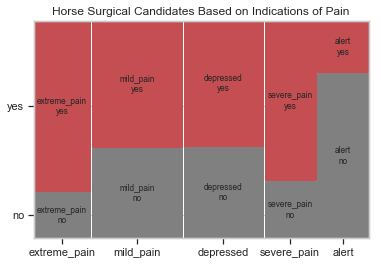

In [1123]:
props = lambda key: {'color': 'r' if 'yes' in key else 'gray'}
pain_vis = mosaic(q3_df, ['pain','surgery'],title='Horse Surgical Candidates Based on Indications of Pain',properties=props)

[Text(0.5, 1, 'Horse Surgical Candidates Based on Indications of Pain')]

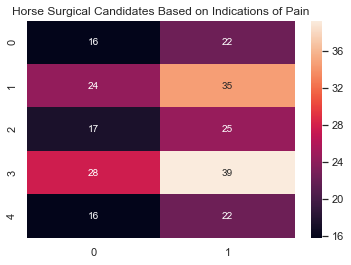

In [1125]:
sns.heatmap(ex_pain,annot=True).set(title="Horse Surgical Candidates Based on Indications of Pain")

## Extremity Temperature

In [1126]:
extremity_temp = pd.crosstab(q3_df.temp_of_extremities,q3_df.surgery,margins=False)
extremity_temp

surgery,no,yes
temp_of_extremities,,
cold,7,20
cool,42,66
normal,35,43
warm,19,11


In [1127]:
chi2, p, dof, ex_temp = chi2_contingency(extremity_temp)
print("chi2 = ", chi2)
print("p-val = ", p)
print("degree of freedom = ",dof)

chi2 =  9.124231302677906
p-val =  0.02768395988750703
degree of freedom =  3


In [1128]:
ex_t=pd.DataFrame(ex_temp)
ex_t

,0,1
0,11.444444,15.555556
1,45.777778,62.222222
2,33.061728,44.938272
3,12.716049,17.283951


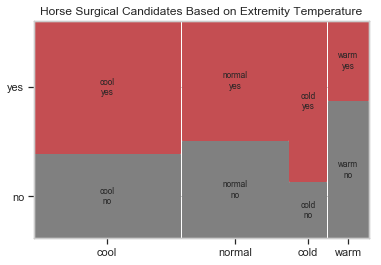

In [1129]:
props = lambda key: {'color': 'r' if 'yes' in key else 'gray'}
pain_vis = mosaic(q3_df, ['temp_of_extremities','surgery'],title='Horse Surgical Candidates Based on Extremity Temperature',properties=props)

[Text(0.5, 1, 'Horse Surgical Candidates Based on Extremity Temperatures')]

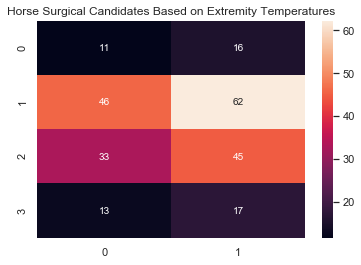

In [1131]:
sns.heatmap(ex_temp,annot=True).set(title="Horse Surgical Candidates Based on Extremity Temperatures")

# Q 4: Using the numerical values provided throughout the dataset, can the implementation of a random forest accurately predict if a horse survives colic?
<br>Train the data and create a random forest to see if there is any predictive value of diagnostics</br>
<br>Use classification</br>

In [1034]:
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import sklearn.ensemble as skens
import sklearn.metrics as skmetric
import sklearn.naive_bayes as sknb
import sklearn.tree as sktree
import sklearn.externals.six as sksix
import IPython.display as ipd
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import os

In [1035]:
q4_df=colic_df[["rectal_temp","pulse","respiratory_rate","packed_cell_volume","total_protein","abdomo_protein","outcome"]].interpolate()

In [1036]:
q4_df.isnull().sum()

rectal_temp           0
pulse                 0
respiratory_rate      0
packed_cell_volume    0
total_protein         0
abdomo_protein        1
outcome               0
dtype: int64

In [1037]:
fill_q4=q4_df.fillna(0,inplace=True)

In [1038]:
x=q4_df.loc[:,q4_df.columns!="outcome"]
y=q4_df.loc[:,q4_df.columns=="outcome"]

In [1039]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)
len(x_train),len(x_test),len(y_train),len(y_test)

(209, 90, 209, 90)

In [1040]:
rf_model = skens.RandomForestClassifier(n_estimators=10,oob_score=True, criterion='entropy')
rf_model.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [1041]:
predicted_labels=rf_model.predict(x_test)
x_test['predicted_rf_tree']=predicted_labels

In [1000]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test,predicted_labels)
print('Accuracy:{0:.2%}'.format(accuracy))

Accuracy:61.11%


In [1003]:
from sklearn.model_selection import GridSearchCV
param_grid={
                'n_estimators':[5,10,15,20,25],
                'max_depth':[2,5,7,9]
}
grid_clf=GridSearchCV(rf_model,param_grid,cv=10)
grid_clf.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=False),
             iid=

In [1004]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=5, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [1005]:
grid_clf.best_params_

{'max_depth': 5, 'n_estimators': 25}

In [1006]:
grid_clf.best_score_

0.7081339712918661

In [1007]:
pd.DataFrame(grid_clf.cv_results_).sort_values(by='mean_test_score').tail(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
1,0.009678,0.001115,0.001976,0.000683,2,10,"{'max_depth': 2, 'n_estimators': 10}",0.727273,0.681818,0.681818,0.636364,0.681818,0.714286,0.70,0.70,0.684211,0.631579,0.684211,0.028782,5
18,0.019881,0.001828,0.002451,0.000448,9,20,"{'max_depth': 9, 'n_estimators': 20}",0.727273,0.727273,0.818182,0.636364,0.636364,0.761905,0.80,0.55,0.684211,0.526316,0.688995,0.092835,3
8,0.019240,0.005396,0.002228,0.000410,5,20,"{'max_depth': 5, 'n_estimators': 20}",0.727273,0.681818,0.727273,0.636364,0.681818,0.761905,0.80,0.55,0.684211,0.631579,0.688995,0.066893,3
12,0.015302,0.001346,0.002214,0.000672,7,15,"{'max_depth': 7, 'n_estimators': 15}",0.681818,0.727273,0.818182,0.590909,0.636364,0.714286,0.75,0.60,0.684211,0.736842,0.693780,0.067722,2
9,0.019361,0.000857,0.002221,0.000092,5,25,"{'max_depth': 5, 'n_estimators': 25}",0.681818,0.863636,0.727273,0.636364,0.636364,0.714286,0.75,0.65,0.736842,0.684211,0.708134,0.066054,1


In [1008]:
grid_clf3=GridSearchCV(rf_model,param_grid,cv=5)
grid_clf3.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=False),
             iid='

In [1009]:
grid_clf3.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [1010]:
grid_clf3.best_score_

0.7081339712918661

In [1011]:
grid_clf3.best_params_

{'max_depth': 9, 'n_estimators': 25}

In [1012]:
param_grid2 = {
                 'n_estimators': [4, 8, 16, 24, 28],
                 'max_depth': [2, 5, 7, 9],
             }
grid_clf5=GridSearchCV(rf_model,param_grid2,cv=10)
grid_clf5.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='entropy',
                                              max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=True, random_state=None,
                                              verbose=0, warm_start=False),
             iid=

In [1013]:
grid_clf5.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=7, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=16,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [1014]:
grid_clf5.best_score_

0.7177033492822966

In [1015]:
grid_clf5.best_params_

{'max_depth': 7, 'n_estimators': 16}

In [1016]:
pd.DataFrame(grid_clf5.cv_results_).sort_values(by='mean_test_score').tail(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
8,0.018007,0.000088,0.002125,0.000060,5,24,"{'max_depth': 5, 'n_estimators': 24}",0.727273,0.772727,0.727273,0.636364,0.636364,0.714286,0.75,0.60,0.631579,0.578947,0.679426,0.064164,5
9,0.020938,0.000363,0.002369,0.000109,5,28,"{'max_depth': 5, 'n_estimators': 28}",0.772727,0.818182,0.727273,0.590909,0.636364,0.714286,0.70,0.65,0.684211,0.526316,0.684211,0.080992,4
19,0.023918,0.002528,0.002675,0.000562,9,28,"{'max_depth': 9, 'n_estimators': 28}",0.681818,0.818182,0.818182,0.590909,0.590909,0.714286,0.80,0.55,0.736842,0.578947,0.688995,0.099728,3
5,0.004943,0.000103,0.001096,0.000079,5,4,"{'max_depth': 5, 'n_estimators': 4}",0.772727,0.772727,0.818182,0.636364,0.590909,0.714286,0.80,0.45,0.684211,0.736842,0.698565,0.106607,2
12,0.013271,0.000131,0.001716,0.000055,7,16,"{'max_depth': 7, 'n_estimators': 16}",0.727273,0.818182,0.818182,0.590909,0.681818,0.761905,0.75,0.70,0.684211,0.631579,0.717703,0.071171,1


In [1018]:
feat_importance=rf_model.feature_importances_
feat_importance

array([0.11987981, 0.21008393, 0.11924145, 0.17876866, 0.20190435,
       0.1701218 ])

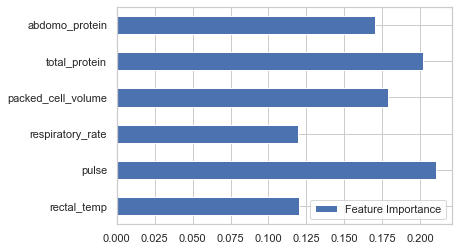

In [1017]:
feat_importance = rf_model.feature_importances_
pd.DataFrame({'Feature Importance':feat_importance},
            index=x_train.columns).plot(kind='barh')